# Preprocessing Data with Scanpy 1.7 - Part I #
## Load packages ##

In [1]:
# Required packages and data paths
# Scanpy 1.7
import scanpy as sc
import scanpy.external as sce
import scipy.io as scio
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

STUD_PATH = '/mnt/workspace_stud/'
DATA_PATH = f'{STUD_PATH}mbentse/'
OUTPUT_PATH = f'{STUD_PATH}stud5/output/'

In [2]:
#INPUT_PATH = f'{DATA_PATH}catlas_objects/liver_sample_9.h5ad'
#TISSUE = INPUT_PATH.split('/')[-1].replace('.h5ad', '')
#TSV_OUT = f"{OUTPUT_PATH}clusters_{TISSUE}.tsv"

## Read input file(s) ##

In [3]:
# Example of reading mutlipe files into one matrix. Adjust for h5ad reading.
# See more at: https://github.com/theislab/scanpy/issues/267

filenames = ['liver_sample_35.h5ad', 
             'liver_sample_37.h5ad', 
             'liver_sample_40.h5ad', 
             'liver_sample_43.h5ad',
             'liver_sample_46.h5ad',
             'liver_sample_7.h5ad',
             'liver_sample_9.h5ad']

adatas = [ad.read(f'{DATA_PATH}catlas_objects/{filename}') for filename in filenames]
adata = adatas[0].concatenate(adatas[1:])

## Filter cells ##
- load data
- remove cells without features and features without corresponding cells

In [4]:
# loading
#adata = ad.read(INPUT_PATH)

# removing
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)
adata

AnnData object with n_obs × n_vars = 194628 × 1151968
    obs: 'batch', 'nb_features'
    var: 'n_cells'

#### Replace separator in var_names ####

In [5]:
names = []
for name in adata.var_names:
    names.append(name)

for i, n in enumerate(names):
    tmp = names[i].replace(':', '_')
    tmp = tmp.replace('-', '_')
    tmp = tmp.split('_')
    names[i] = '_'.join([tmp[0], tmp[-2], tmp[-1]])

adata.var_names = pd.Index(names)

In [8]:
adata.raw = adata

#### Binarize loaded data ####

In [6]:
epi.pp.binarize(adata)
adata.layers['binary'] = adata.X.copy()

### Additional Filtering ###
- show open features per cell
- show numbers of cells sharing features

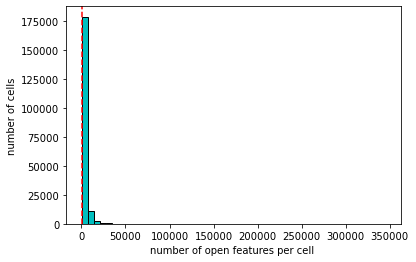

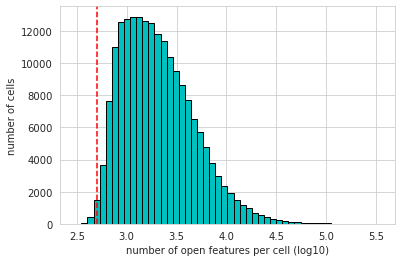

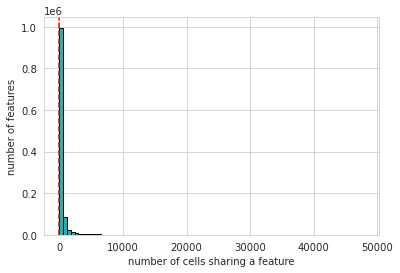

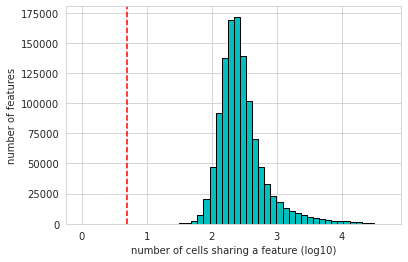

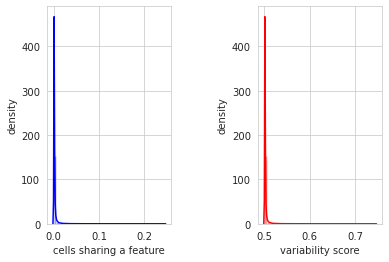

In [7]:
# show open features per cell
min_features = 500

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features)
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features)

# show numbers of cells sharing features
min_cells = 5

epi.pp.coverage_features(adata, binary=True, log=False, bins=50,
               threshold=min_cells)
epi.pp.coverage_features(adata, binary=True, log=10, bins=50,
               threshold=min_cells)

epi.pp.cal_var(adata)

In [7]:
#min_score_value = 0.505
#nb_feature_selected = 120000
#epi.pl.variability_features(adata,log=None, min_score=min_score_value, nb_features=nb_feature_selected)
#epi.pl.variability_features(adata,log='log10', min_score=min_score_value, nb_features=nb_feature_selected)

In [9]:
#adata = epi.pp.select_var_feature(adata,
#                                  nb_features=nb_feature_selected,
#                                  show=False,
#                                  copy=True)

## Violin Plot ##
- get overview how many features majority of cells has

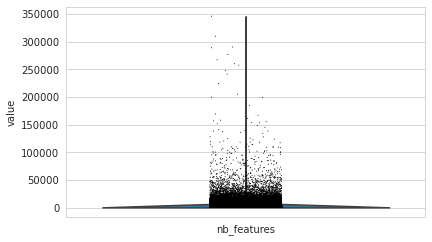

In [9]:
epi.pl.violin(adata, ['nb_features'])

- remove cells with more than 10k features / less than 100

In [10]:
epi.pp.filter_cells(adata, min_features=10)
epi.pp.filter_cells(adata, max_features=10000)

- remove features without cells / more than 150 cells sharing

In [11]:
epi.pp.filter_features(adata, min_cells=1)
epi.pp.filter_features(adata, max_cells=150)

- show filtered overview of cells

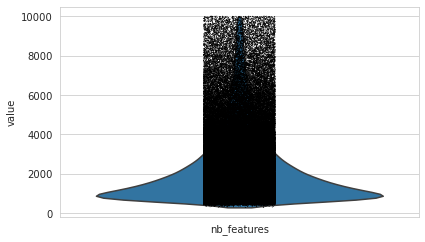

In [12]:
epi.pl.violin(adata, ['nb_features'])

### Write data out for wp4 ###

In [15]:
# Write data for wp4
#output_wp4 = f'{OUTPUT_PATH}wp4/{TISSUE}'
#adata.var.to_csv(f'{output_wp4}_var.csv', sep='\t')
#scio.mmwrite(f'{output_wp4}_X.mtx', adata.X)
#adata

### Normalize and write to file ###
- normalize data for plots (has to be in scanpy 1.7)

In [13]:
epi.pp.normalize_total(adata)
adata.layers['normalised'] = adata.X.copy()
epi.pp.log1p(adata)

- write h5ad file for further analysis in scanpy 1.8

In [14]:
#adata.write_h5ad(f'{OUTPUT_PATH}complete_liver_clpp17.h5ad') # min_feat=10, max_feat=10000, min_cells=1, max_cells=150
#adata.write_h5ad(f'{OUTPUT_PATH}complete_liver_clpp17_mc10.h5ad') # min_cells=10
adata.write_h5ad(f'{OUTPUT_PATH}complete_liver_clpp17_Z9a.h5ad') # Zelle 8-9 auskommentiert, Zelle 7 nicht